# Importing Libraries and Datasets

In [1]:
#importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew


In [2]:
#input data file directiory
import os
print(os.listdir("/home/aloisstar/Downloads/training data model/tuned random"))
#Any result written to current directory is saved to as output

['train.csv', 'data_description.txt', 'us-income-logistic-regression.ipynb', 'test.csv', 'sample_submission-1.csv']


In [3]:
#importing the supplied dataset and storing it into frame
training = pd.read_csv("/home/aloisstar/Downloads/training data model/tuned random/train.csv")
test = pd.read_csv("/home/aloisstar/Downloads/training data model/tuned random/test.csv")
#making copy of original dataset for rest of kernel
df_train = training.copy()
df_test = test.copy()


In [4]:
target = df_train['SalePrice']  #target variable
df_train = df_train.drop('SalePrice', axis = 1)     #drop target variable from training dataset
df_train['training_set'] = True     #assign an extra variable to trainig and testing dataset before joining them
df_test['training_set'] = False
df_full = pd.concat([df_train, df_test])   #concatenate both dataframe prior to EDA

# Exploratory Data Analysis

In [5]:
df_full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#we can drop id column which is redudant
df_full.drop('Id', axis = 1, inplace = True)

In [7]:
df_full.shape 

(2919, 80)

In [8]:
df_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,training_set
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,True
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,True
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,True
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,True
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,True


In [9]:
df_full.info() #lets have a look at variable type in our dataframe


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [10]:
#lets break down the columns by their type
df_full.columns.to_series().groupby(df_full.dtypes).groups

{dtype('bool'): Index(['training_set'], dtype='object'),
 dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea'],
       dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'E

In [11]:
len(df_full.columns)

80

In [12]:
df_full.shape

(2919, 80)

SALEPRICE VARIABLE

### ANALYSIS

In [13]:
#lets see if there missing value
print("There are {} NA values in 'SalePrice'".format(target.isnull().values.sum()))

There are 0 NA values in 'SalePrice'


In [14]:
#lets get some stats on saleprice
minimum_price = np.min(target)
maximum_price = np.max(target)
mean_price = np.mean(target)
median_price = np.median(target)
std_price = np.std(target)

#Show the calculated statistics
print("Stastistics for the supplied house price training dataset:")
print("Minimum Price: ${:,.2f}".format(minimum_price))
print("Maximum Price: ${:,.2f}".format(maximum_price))
print("Mean Price: ${:,.2f}".format(mean_price))
print("Median Price: ${:,.2f}".format(median_price))
print("Standard Deviation Price: ${:,.2f}".format(std_price))

Stastistics for the supplied house price training dataset:
Minimum Price: $34,900.00
Maximum Price: $755,000.00
Mean Price: $180,921.20
Median Price: $163,000.00
Standard Deviation Price: $79,415.29


/home/aloisstar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


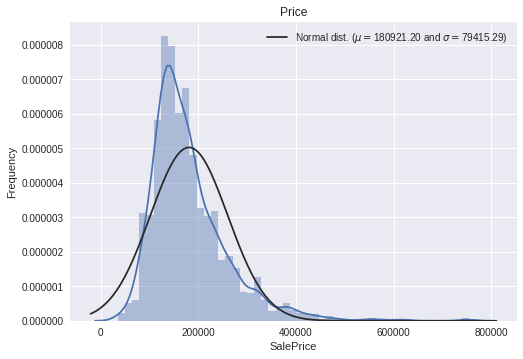

In [15]:
#lets plot the histogram with the fitted parameter with the function
sns.distplot(target, fit = norm);
#get mean and standard deviation
(mu, sigma) = norm.fit(target)
#add legends to the plot
plt.legend(['Normal dist. ($\mu =${:.2f} and $\sigma = ${:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel("Frequency")
plt.title('Price')
plt.show()

In [16]:
print("Skewness: %f" %target.skew())

Skewness: 1.882876


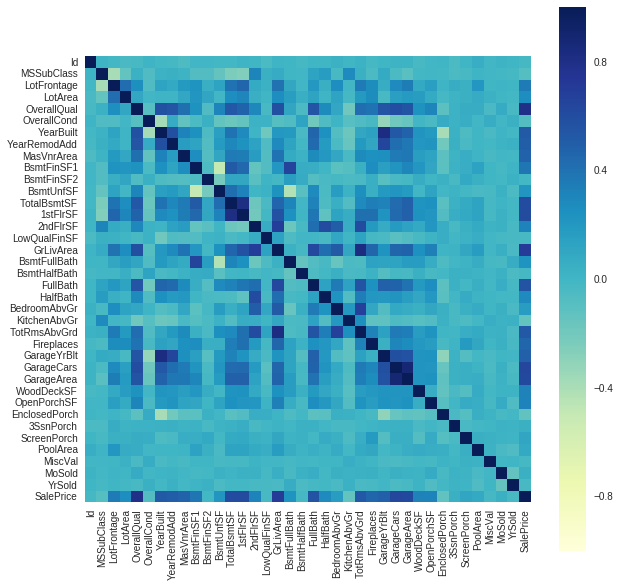

In [17]:
#correlation map tos see how feature are related to each other
corrmat = training.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square = True, cmap= "YlGnBu");
plt.show()

    # Log transformation
   

In [18]:
#applying log transformation
target = np.log(target)

/home/aloisstar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


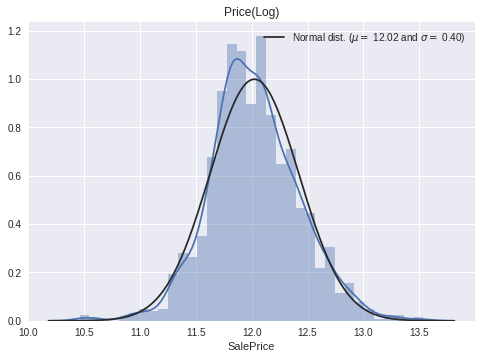

In [19]:
#lets plot the histogram with fitted parameter used by the function
sns.distplot(target, fit= norm)
(mu, sigma) = norm.fit(target)
plt.legend(["Normal dist. ($\mu= $ {:.2f} and $\sigma= $ {:.2f})".format(mu, sigma)], loc = 'best')
plt.title('Price(Log)');
plt.show()

In [20]:
print("Skewness: %f" %target.skew())

Skewness: 0.121335


/home/aloisstar/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


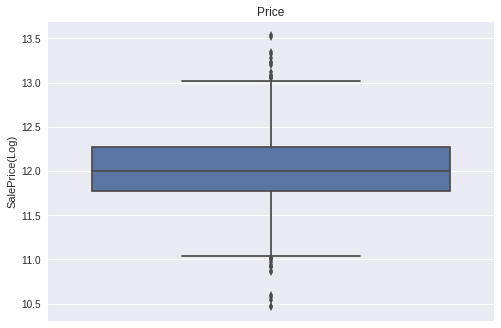

In [21]:
#To get the visual of Outlier lets plot the boxplt
sns.boxplot(y = target)
plt.ylabel('SalePrice(Log)')
plt.title('Price');
plt.show()

# Data Processing

#### Handling Missing Value

In [22]:
perc_na = (df_full.isnull().sum()/len(df_full))*100
ratio_na = perc_na.sort_values(ascending =False)
missing_data = pd.DataFrame({'Missing Ratio' :ratio_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


In [23]:
#dropping variable with > 15% missing value
df_full.drop('PoolQC', axis =1, inplace = True)
df_full.drop('MiscFeature', axis=1, inplace =True)
df_full.drop('Alley', axis = 1, inplace =True)
df_full.drop('Fence', axis = 1, inplace = True)
df_full.drop('FireplaceQu', axis =1, inplace = True)
df_full.drop('LotFrontage', axis =1, inplace = True)

In [24]:
df_full.shape

(2919, 74)

In [25]:
df_full.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [26]:
#lets list all the numeric columns from df_training
numeric_variables = list(df_full.select_dtypes(include = ['int64', 'float64']).columns.values)
#Apply per column median of that column and fill with that value
df_full[numeric_variables] = df_full[numeric_variables].apply(lambda x: x.fillna(x.median()), axis =0)

In [27]:
#lets list all non-numerical column from df_training
categorical_variables = list(df_full.select_dtypes(exclude=['int64', 'float64', 'bool']).columns.values)
#Apply per columns median of that columns and fill with that value
df_full[categorical_variables] = df_full[categorical_variables].apply(lambda x: x.fillna("None"),axis = 0)

In [28]:
#lets check that we no longer have any missing value
perc_na = (df_full.isnull().sum()/len(df_full)) *100
ratio_na = perc_na.sort_values(ascending = False)
missing_data = pd.DataFrame({'missing_ratio': ratio_na})
missing_data = missing_data.drop(missing_data[missing_data.missing_ratio ==0].index)
missing_data.head(5)

,missing_ratio


##### Dummy variable

In [29]:
#convert categorical variable into Dummy variable
df_full  = pd.get_dummies(df_full)

In [30]:
df_full.shape

(2919, 287)

# Prediction Model

#### Data Preparation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer     #import matrics from sklearn
from time import time

In [32]:
df_train = df_full[df_full['training_set']==True]
df_train = df_train.drop('training_set', axis = 1)
df_test = df_full[df_full['training_set']==False]
df_test = df_test.drop('training_set',axis = 1)

In [33]:
(df_train.shape, df_test.shape)

((1460, 286), (1459, 286))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, random_state =42)

Random Forest Regressor## 

In [35]:
#number of forest in n-estimator is 100
#number of jobs to run in parallel is set to the number of cores (n_jobs = -1)
rf_model = RandomForestRegressor(n_estimators = 100, n_jobs=-1)

In [36]:
#fit the model
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)

### Optimizing Random Forest Regressor HyperParameter

In [37]:
from sklearn.model_selection import GridSearchCV  #Search over specified parameter values for an estimator
from sklearn.model_selection import RandomizedSearchCV    #Search over specified parameter values for an estimator
from sklearn.model_selection import ShuffleSplit       #Random permutation cross validator

In [38]:
start = time()   #Get start time
rf_regressor = RandomForestRegressor(random_state=42)
cv_sets = ShuffleSplit(random_state = 4)   #shuffling our data for cross validation
parameters = {'n_estimators':[100, 120, 140],
             'min_samples_leaf':[1, 2, 3],
             'max_depth':[10, 15, 20]}
scorer = make_scorer(r2_score)
n_iter_search =10
grid_obj = RandomizedSearchCV(rf_regressor,
                             parameters,
                             n_iter=n_iter_search,
                             scoring = scorer,
                             cv = cv_sets,
                             random_state =99)
grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

end =time()   #get end time
#calculate training time
rf_time = (end-start)/60
print('It took {:.2f} minutes for  RandomSearchCV to converge to optimised parameter for the RF model'.format(rf_time))

It took 3.51 minutes for  RandomSearchCV to converge to optimised parameter for the RF model


In [39]:
#get the best parameter
grid_fit.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 120}

In [40]:
rf_opt_preds = rf_opt.predict(X_test) #RF prediction

#### Feature Importance

In [41]:
importances  = rf_opt.feature_importances_
X_train.columns.values[(np.argsort(importances)[::1])[:5]]    #the top 5 feature

array(['Condition1_RRNe', 'Electrical_Mix', 'MSZoning_None',
       'Utilities_AllPub', 'Utilities_NoSeWa'], dtype=object)

In [42]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(random_state = 42)

In [43]:
import warnings
warnings.filterwarnings("ignore")
start = time()  # get the start time
cv_sets_xgb =ShuffleSplit(random_state = 10)    #shuffling data for the cross validation
parameter_xgb ={'n_estimators':[7000, 7500, 8000],
                'learning_rate':[0.05,0.60,0.70],
               'max_depth':[3, 5, 7],
                'min_child_weight':[1,1.5,2]}
scorer_xgb = make_scorer(r2_score)
grid_obj_xgb = RandomizedSearchCV(xgb_regressor,
                                 parameter_xgb,
                                 scoring = scorer_xgb,
                                 cv = cv_sets_xgb,
                                 random_state = 99)
grid_fit_xgb = grid_obj_xgb.fit(X_train, y_train)
xgb_opt = grid_fit_xgb.best_estimator_

end = time()  # get end time
xgb_time = (end-start)/ 60   #calculate training time
print("It took {:.2f} minutes for RandomizedSearchCV to converge to optimized parameter for XGBoost modedl".format(rf_time) )


It took 3.51 minutes for RandomizedSearchCV to converge to optimized parameter for XGBoost modedl


In [44]:
#get the estimators best parameter 
grid_fit_xgb.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1.5,
 'n_estimators': 7500}

In [45]:
#XGBoost with tuned parameterss
xgb_opt = xgb.XGBRegressor(learning_rate = 0.5, max_depth = 5,
                          min_child_weight = 1.5, n_estimators =7500,
                          seed = 42, silent = 1)

In [46]:
xgb_opt.fit(X_train, y_train)
xgb_opt_predict = xgb_opt.predict(X_test)      #XGBoost prediction

### Lasoo Regressor

In [47]:
#from sklearn.linear_model import Lasso
#lasso_regr = Lasso(random_state = 42)


from sklearn.linear_model import Lasso
lasso_regr = Lasso(random_state=42)


In [48]:
start = time()
cv_sets_lasso = ShuffleSplit()
parameter_lasso = {'alpha':[0.0005,0.001, 0.002, 0.003],
                  'max_iter':[40000,50000,60000],}
scorer_lasso = make_scorer(r2_score)
grid_obj_lasso = RandomizedSearchCV(lasso_regr,
                                    parameter_lasso,
                                    scoring  = scorer_lasso,
                                    cv = cv_sets_lasso,
                                    random_state = 99)
grid_fit_lasso = grid_obj_lasso.fit(X_train, y_train)
lasso_opt = grid_fit_lasso.best_estimator_

end = time()
lasso_time = (end-start)/60
print("It took {:.2f} minutes for RandomizedSearchCV to converge to optimised parameter for lasso regression".format(lasso_time))

It took 0.05 minutes for RandomizedSearchCV to converge to optimised parameter for lasso regression


In [49]:
#get the estimator best parameters
lasso_opt.fit(X_train, y_train)
lasso_opt_predict = lasso_opt.predict(X_test)     #lasso prediction

#### Model Performance Comparison

In [50]:
#Random Forest
rf_r2 = r2_score(y_test, y_predict)
rf_mse = mean_squared_error(y_test, y_predict)
#Tuned Random Forest
optrf_r2 = r2_score(y_test, rf_opt_preds)
optrf_mse = mean_squared_error(y_test, rf_opt_preds)

#XGBoost
xgb_r2 = r2_score(y_test, xgb_opt_predict)
xgb_mse = mean_squared_error(y_test, xgb_opt_predict)

#Lasso 
lasso_r2 = r2_score(y_test, lasso_opt_predict)
lasso_mse = mean_squared_error(y_test, lasso_opt_predict)

In [51]:
#lets compare using dataframe
#d = {'1.RF': [rf_r2, rf_mse]
 #   '2. Tuned Rf' : [optrf_r2, optrf_mse],
 #   '3. XGBoost': [xgb_r2, xgb_mse]}
 #   '4. Lasso' : [lasso_r2, lasso_mse]
    
d = {'1. RF': [rf_r2, rf_mse], 
     '2. Tuned RF': [optrf_r2, optrf_mse], 
     '3. XGBoost': [xgb_r2, xgb_mse],
     '4. Lasso': [lasso_r2, lasso_mse]}
d_i = ['R2', 'Mean Squared Error']
df_result = pd.DataFrame(data = d, index =d_i)
print(df_result)


                       1. RF  2. Tuned RF  3. XGBoost  4. Lasso
R2                  0.888022     0.884878    0.848588  0.915806
Mean Squared Error  0.019390     0.019934    0.026218  0.014579


# ENSEMBLE WEIGHT

In [52]:
from scipy.optimize import minimize

In [53]:
#finding the optimum weight 
clfs = [xgb_opt, lasso_opt]   #lets focus on our top two performers XGBoosting and Lasso
predictions = []
for clf in clfs:
    predictions.append(clf.predict(X_test))    #listing all our prediction


In [56]:
def mse_func(weights):
    # scipy minimize will pass the weights as numpy array
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
        final_prediction += weight*prediction
    return mean_squared_error(y_test, final_prediction)

starting_values = [0.5] *len(predictions)    #minimize needs a starting values
bounds  = [(0,1)]* len(predictions)
res = minimize(mes_func,
              starting_values,
              bounds = bounds,
              method = 'SLSQP')
print('Result Assesment:{message_algo}'.format(message_algo = res['message']))
print('Ensemble score:{best_score}'.format(best_score = res['fun']))
print('Best Weight:{weights}'.format(weights = res['x']))


NameError: name 'mes_func' is not defined

In [ ]:
#these are the weights that minimize MSE for our stacked model
xgb_opt_weight = res['x'][0]
lasso_opt_weight = res['x'][1]

In [ ]:
#get the prediction for df_test case for each model
y_pred_xgb = xgb_opt.predict(df_test)
y_pred_lasso = lasso_opt.predict(df_test)
#Blend the result of three regressor using our model weights
y_pred = (xgb_opt_weight*y_pred_xgb+lasso_opt_weight*y_pred_lasso)
#lets not forget to apply exponential function as we applied log to our data
y_pred_final = np.exp(y_pred)

# Submission

In [ ]:
#Final Submissinon
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred_final})
my_submission.to_csv('Tune.csv', index = False)